# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [77]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [78]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

# Import Data

In [79]:
# Import the necessary CSVs to Pandas DataFrames
# YOUR CODE HERE!
file_path = Path("sfo_units_year.csv")
sfo_units_year = pd.read_csv(file_path)
sfo_units_year.head()

,2010,372560
0,2011,374507
1,2012,376454
2,2013,378401
3,2014,380348
4,2015,382295


In [80]:
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [81]:
neighborhood_coor = pd.read_csv(
    Path("neighborhoods_coordinates.csv"))

neighborhood_coor.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [95]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # YOUR CODE HERE!
    plot_sf_units_year =sfo_units_year.plot.bar()
    plt.title("San Francisco Housing Units 2010 to 2016")
    plt.xlabel("Year")
    plt.ylabel("Units")
    plt.ylim(350000,390000)
    return plot_sf_units_year

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price_rent=sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()

    plot_avg_rents=avg_sale_price_rent.plot(y='gross_rent')
    plt.title("Average Gross Rent by Year")
    plt.xlabel("Year")
    plt.ylabel("Gross Rent")
    return plot_avg_rents

def average_sales_price():
    """Average Sales Price Per Year."""
    
    # YOUR CODE HERE!
    avg_sale_price_rent=sfo_data.groupby('year')['sale_price_sqr_foot','gross_rent'].mean()
    
    plot_avg_sales=avg_sale_price_rent.plot(y='sale_price_sqr_foot')
    plt.title("Average Price per SqFt by Year")
    plt.xlabel("Year")
    plt.ylabel("Price per SqFoot")
    return plot_avg_sales


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # YOUR CODE HERE!
    neighborhood_year=sfo_data.groupby(['year','neighborhood']).mean().add_suffix('_avg').reset_index()
    plot_neighborhood_year=neighborhood_year.hvplot(x='year',y='sale_price_sqr_foot_avg',groupby='neighborhood',kind='line')
    return plot_neighborhood_year


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    # YOUR CODE HERE!
    neighborhood_price=sfo_data.groupby(['neighborhood']).mean().add_suffix('_avg').reset_index()
    top_neighborhoods=neighborhood_price.sort_values('sale_price_sqr_foot_avg', ascending=False,).nlargest(10,'sale_price_sqr_foot_avg').reset_index() 

    plot_top_neighborhoods=top_neighborhoods.hvplot(x='neighborhood',y='sale_price_sqr_foot_avg', kind='bar'). opts(xrotation=90)
    return plot_top_neighborhoods

def most_expensive_neighborhood_top_ten_year():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    neighborhood_year=sfo_data.groupby(['year','neighborhood']).mean().add_suffix('_avg').reset_index()
    top_ten_year=neighborhood_year.sort_values('sale_price_sqr_foot_avg', ascending=False,).nlargest(10,'sale_price_sqr_foot_avg').reset_index() 

    plot_top_ten_year=top_ten_year.hvplot(x='year',y=('gross_rent_avg','sale_price_sqr_foot_avg'),groupby='neighborhood',kind='bar'). opts(xrotation=90)
    return plot_top_ten_year

    # YOUR CODE HERE!
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # YOUR CODE HERE!
    neighborhood_year=sfo_data.groupby(['year','neighborhood']).mean().add_suffix('_avg').reset_index()
    top_ten_year=neighborhood_year.sort_values('sale_price_sqr_foot_avg', ascending=False,).nlargest(10,'sale_price_sqr_foot_avg').reset_index() 
    df_expensive_neighborhoods_per_year = top_ten_year[top_ten_year["neighborhood"].isin(top_ten_year["neighborhood"])]

    plot_parallel_coordinates=px.parallel_coordinates(df_expensive_neighborhoods_per_year, color='sale_price_sqr_foot_avg')
    return plot_parallel_coordinates
def parallel_categories():
    """Parallel Categories Plot."""
    
    # YOUR CODE HERE!
    neighborhood_year=sfo_data.groupby(['year','neighborhood']).mean().add_suffix('_avg').reset_index()
    top_ten_year=neighborhood_year.sort_values('sale_price_sqr_foot_avg', ascending=False,).nlargest(10,'sale_price_sqr_foot_avg').reset_index() 
    df_expensive_neighborhoods_per_year = top_ten_year[top_ten_year["neighborhood"].isin(top_ten_year["neighborhood"])]
    plot_parallel_categories=px.parallel_categories(df_expensive_neighborhoods_per_year, color='sale_price_sqr_foot_avg')
    return plot_parallel_categories

def neighborhood_map():
    """Neighborhood Map."""

    # YOUR CODE HERE!
    neighborhood_cost=sfo_data.groupby(['neighborhood']).mean().reset_index()
    neighborhood_cost.rename(columns={"neighborhood":"Neighborhood"}, inplace=True)

    sf_neighborhoods = pd.concat([neighborhood_cost,neighborhood_coor], axis='columns', join='inner')
    map_1= px.scatter_mapbox(
    sf_neighborhoods,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    size='sale_price_sqr_foot',
    title="Average Sale Price Per Square Foot and Rent in San Francisco")

    return map_1

def sunburst():
    """Sunburst Plot."""
    
    # YOUR CODE HERE!
    neighborhood_year=sfo_data.groupby(['year','neighborhood']).mean().add_suffix('_avg').reset_index()
    top_ten_year=neighborhood_year.sort_values('sale_price_sqr_foot_avg', ascending=False,).nlargest(10,'sale_price_sqr_foot_avg').reset_index() 
    df_expensive_neighborhoods_per_year = top_ten_year[top_ten_year["neighborhood"].isin(top_ten_year["neighborhood"])]
    sf_sunburst=px.sunburst(df_expensive_neighborhoods_per_year, path=['year', 'neighborhood'],values='sale_price_sqr_foot_avg',color='gross_rent_avg')
    return sf_sunburst

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

Tabs
    [0] Markdown(str)
    [1] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive15972')
    [2] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive15781')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive15787')
    [3] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive15724')
                    [0] HoloViews(DynamicMap, name='interactive15724')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(AxesSubplot, name='interactive15761')
    [4] Row
        [0] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive15794')
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive15924')
                    [0] HoloViews(DynamicMap, name='interactive15924')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Union Square District', ...], value='Union Square District', width=250)
                        [1] VSpacer()
    [5] Column
        [0] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive15768')
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive15774')
    [6] Column
        [0] Column()
        [1] Row
            [0] Plotly(Figure, name='interactive15978')

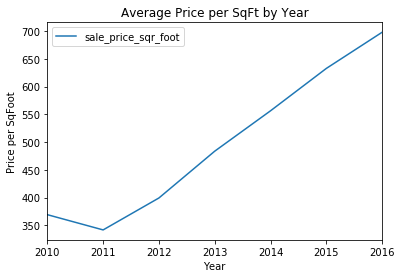

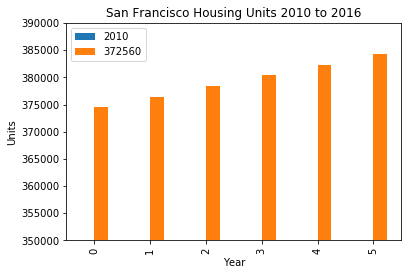

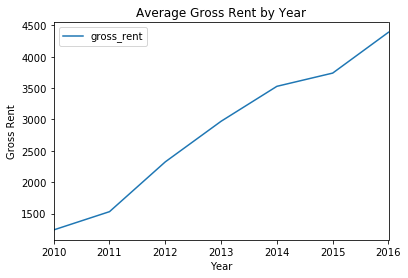

In [98]:
# Create a Title for the Dashboard
# YOUR CODE HERE!
dashboard_title='# San Francisco Real Estate Analysis'


column1=pn.Column(average_price_by_neighborhood,average_sales_price)
column2=pn.Column(parallel_coordinates,parallel_categories)
row1=pn.Row(housing_units_per_year,average_gross_rent)
row2=pn.Row(top_most_expensive_neighborhoods,most_expensive_neighborhood_top_ten_year)

# Create a tab layout for the dashboard
# YOUR CODE HERE!
tabs=pn.Tabs(dashboard_title,
             ("Neighborhood Map",neighborhood_map),
           ("Units & Rent",row1),
           ("Sales Price",column1),
           ("Top Neighborhoods",row2),
           ("Parrallel Plots",column2),
            ("Sunburst Plot",sunburst))

# Create the dashboard
# YOUR CODE HERE!
tabs

## Serve the Panel Dashboard

In [ ]:
# Serve the# dashboard
# YOUR CODE HERE!

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

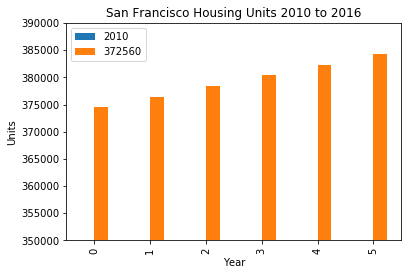

In [65]:
housing_units_per_year()

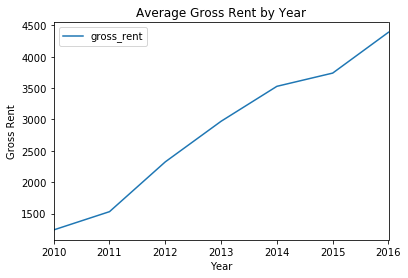

In [66]:
average_gross_rent()

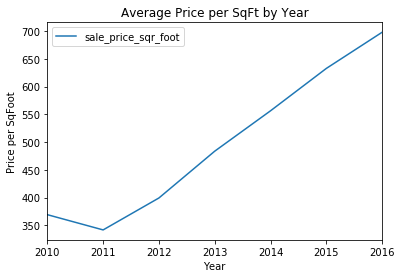

In [67]:
average_sales_price()

In [68]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot_avg)

In [69]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot_avg)

In [70]:
most_expensive_neighborhood_top_ten_year()


:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

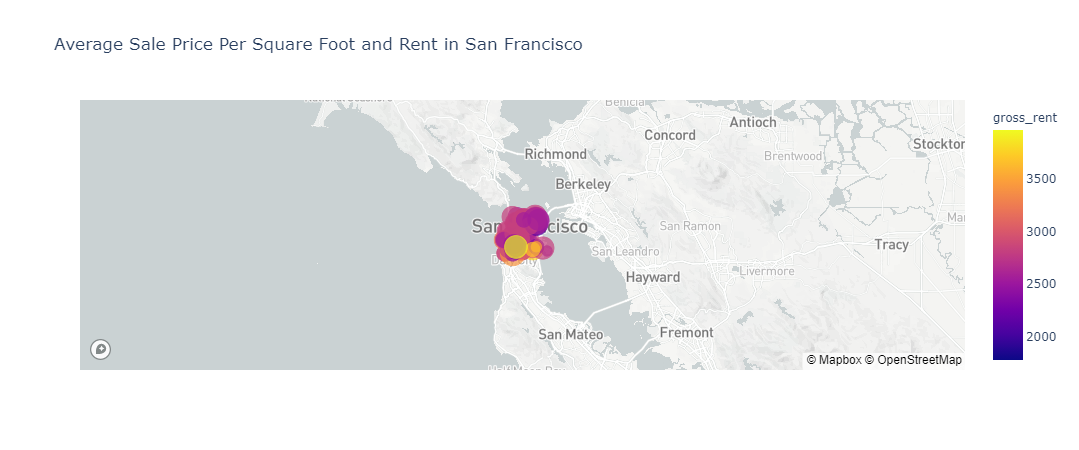

In [73]:
neighborhood_map().show()

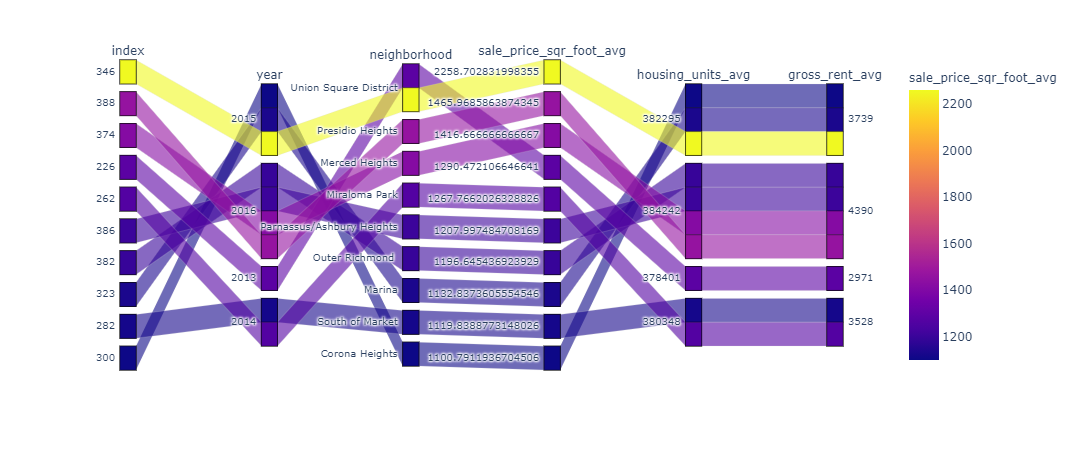

In [74]:
parallel_categories()

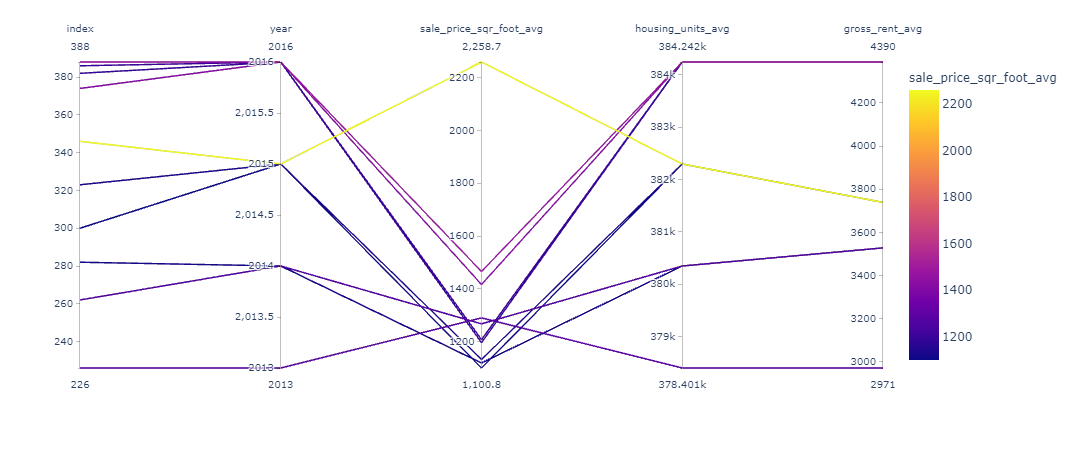

In [75]:
parallel_coordinates()

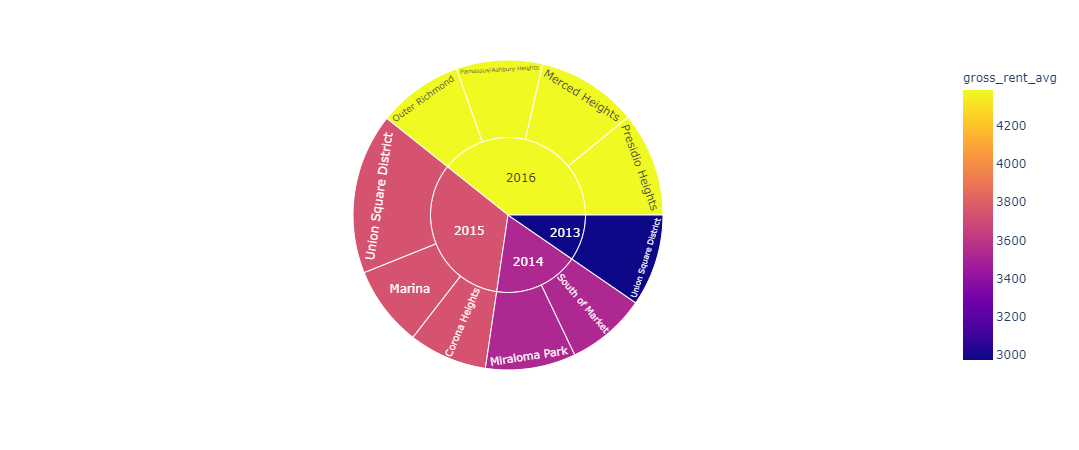

In [76]:
sunburst()